This notebook will be used to investigate the number of mergers/exposions that occur within each metallicity bin. We'll use Lieke's [notebook](https://github.com/LiekeVanSon/Proj_Melanie/blob/master/code/masterfolder/Test_fbinary_perM.ipynb) to calcuate the star forming mass per binary. 

In [1]:
# let's import things
import h5py as h5 
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 

Let's get the WD+WD data

In [2]:
# # reading in the HDF5 file
# pathToweights_H5 = '/home/jovyan/CompasOutput/v03.08.01/N1e6_MassiveWDWD_NSNS_CEalpha1/MainRun/COMPAS_Output_wWeights.h5'  #path of the hdf5 file

# Data_weights = h5.File(pathToweights_H5,"r")

# # let's gather the system parameters group 
# SP_WD_data = pd.DataFrame() # making a pandas dataframe

# # from the double compact object group
# keys_of_interest = ['Coalescence_Time', 'Eccentricity@DCO','Mass(1)',
#        'Mass(2)', 'Merges_Hubble_Time', 'Metallicity@ZAMS(1)', 'SEED',
#        'SemiMajorAxis@DCO', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Time',
#        'mixture_weight']

# for key in keys_of_interest: #looping through the "keys" or paramters in BSE_System_Parameters

#     SP_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

# # Rates info directly taking out the 
# merger_SEED = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['SEED'][()]
# rates_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate'][()]
# rates_z0_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate_z0'][()]
# DCO_mask = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]
# redshifts = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['redshifts'][()]

# Data_weights.close()

In [3]:
# reading in the HDF5 file
# pathToweights_H5 = '/home/jovyan/home/copy_h5_files/v03.08.01/CEalpha025/N1e6_MassiveWDWD_NSNS_CEalpha025_fbinNone.h5'  #path of the hdf5 file
pathToweights_H5 = '/home/jovyan/CompasOutput/v03.08.01/N1e6_MassiveWDWD_NSNS_CEalpha1/MainRun/COMPAS_Output_wWeights.h5'  #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5,"r")

# let's gather the system parameters group 
SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

# Rates info directly taking out the 
merger_SEED = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['SEED'][()]
rates_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate'][()]
rates_z0_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate_z0'][()]
DCO_mask = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]
redshifts = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['redshifts'][()]
# rates_info = Data_weights["Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048"]

Data_weights.close()

In [10]:
SP_WD_data.keys()

Index(['CE_Event_Counter', 'Coalescence_Time', 'Eccentricity@DCO',
       'Immediate_RLOF>CE', 'MT_Donor_Hist(1)', 'MT_Donor_Hist(2)', 'Mass(1)',
       'Mass(2)', 'Merges_Hubble_Time', 'Metallicity@ZAMS(1)', 'Optimistic_CE',
       'Record_Type', 'Recycled_NS(1)', 'Recycled_NS(2)', 'SEED',
       'SemiMajorAxis@DCO', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Time',
       'dmMT(1)', 'dmMT(2)', 'dmWinds(1)', 'dmWinds(2)', 'mixture_weight'],
      dtype='object')

Let's first see how our metallicities are drawn in log space (unifrom, favored towards one, etc.)

In [4]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/CompasOutput/v03.08.01/N1e6_WDWD/MainRun/COMPAS_Output_wWeights.h5'  #path of the hdf5 file
# pathToweights_H5 = '/home/jovyan/CompasOutput/v03.08.01/N1e6_MassiveWDWD_NSNS_CEalpha1/MainRun/COMPAS_Output_wWeights.h5'  #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5,"r")

# printing the max of the metallicities in this hdf5 file
print(max(Data_weights['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()]))

# let's gather the system parameters group 
SPS_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SPS_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

Data_weights.close()


0.029999595520126744


In [5]:
# let's first make our bins that we want that are evenly spaced in log
metallicities = np.array(SPS_WD_data['Metallicity@ZAMS(1)'])
metallicities_log = np.log10(metallicities)
bins_Z_SPS = np.linspace(-4, np.log10(0.03), 20) # making sure we are considereing the bounds of COMPAS (so that np.digitze does not create extra bins)
bins_Z_SPS

array([-4.        , -3.8696252 , -3.73925039, -3.60887559, -3.47850079,
       -3.34812599, -3.21775118, -3.08737638, -2.95700158, -2.82662677,
       -2.69625197, -2.56587717, -2.43550237, -2.30512756, -2.17475276,
       -2.04437796, -1.91400315, -1.78362835, -1.65325355, -1.52287875])

In [6]:
counts_bins_SPS = pd.cut(np.log10(SPS_WD_data['Metallicity@ZAMS(1)']), bins=bins_Z_SPS).value_counts(sort=False)
counts_bins_SPS

Metallicity@ZAMS(1)
(-4.0, -3.87]       53193
(-3.87, -3.739]     53058
(-3.739, -3.609]    53171
(-3.609, -3.479]    53099
(-3.479, -3.348]    53705
(-3.348, -3.218]    53028
(-3.218, -3.087]    53186
(-3.087, -2.957]    52975
(-2.957, -2.827]    52829
(-2.827, -2.696]    52648
(-2.696, -2.566]    52631
(-2.566, -2.436]    52431
(-2.436, -2.305]    52370
(-2.305, -2.175]    52353
(-2.175, -2.044]    52340
(-2.044, -1.914]    51541
(-1.914, -1.784]    51929
(-1.784, -1.653]    51757
(-1.653, -1.523]    51756
Name: count, dtype: int64

This looks pretty uniform but let's visualize this

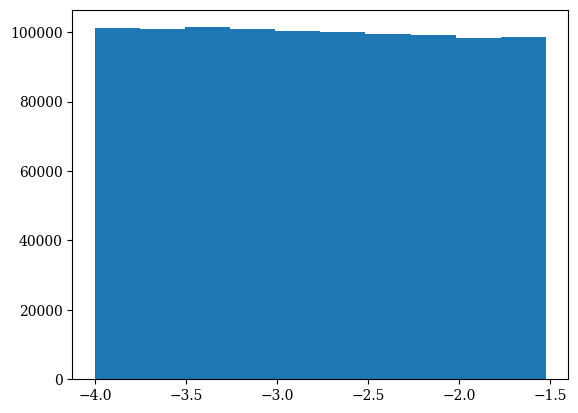

In [7]:
# let's make a histogram where the weights are the mixture weights 

metallicities = SPS_WD_data['Metallicity@ZAMS(1)']
weights = SPS_WD_data['mixture_weight']

plt.hist(np.log10(metallicities), weights=weights)
plt.show()


# sampled uniform in log but AIS will favor things that are likely to merge which are things with a certain metallicity at birth

Let's just select for these WD+WD in our DCO table

In [8]:
# let's try selecting all systems with white dwarfs now using the np.isin technique

# WDWD_mask = np.logical_and(np.isin(SP_WD_data['Stellar_Type(1)'],[10,11,12]),np.isin(SP_WD_data['Stellar_Type(2)'],[10,11,12]))
SP_DCO_DATA = SP_WD_data[DCO_mask]

# let's make sure that at least one of these white dwarfs are COWD
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(SP_DCO_DATA)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))

SP_COWD_DATA = SP_DCO_DATA[carbon_oxygen_bool]

Let's bin the metallicities evenly in log so that when we eventually normalize it, the average star formaing mass needed is just a constant

In [9]:
# let's first make our bins that we want that are evenly spaced in log
metallicities = np.array(SP_COWD_DATA['Metallicity@ZAMS(1)'])
metallicities_log = np.log10(metallicities)
bins_Z = np.linspace(-4, np.log10(0.03), 20) # making sure we are considereing the bounds of COMPAS (so that np.digitze does not create extra bins)
bins_Z

# make bins slightly lower than min and slightly higher than min to get all of the systems (10^-4 for lower limit), log10(0.03) for upper limit

array([-4.        , -3.8696252 , -3.73925039, -3.60887559, -3.47850079,
       -3.34812599, -3.21775118, -3.08737638, -2.95700158, -2.82662677,
       -2.69625197, -2.56587717, -2.43550237, -2.30512756, -2.17475276,
       -2.04437796, -1.91400315, -1.78362835, -1.65325355, -1.52287875])

We now want to count how many systems are in each of these metallicity bins

In [10]:
# # using value_counts to count how many systems fit into each bin
# print(np.log10(merging_all_WD['Metallicity@ZAMS(1)']).value_counts(sort=False,bins=20))

In [11]:
counts_bins = pd.cut(np.log10(SP_COWD_DATA['Metallicity@ZAMS(1)']), bins=bins_Z).value_counts(sort=False)
counts_bins

Metallicity@ZAMS(1)
(-4.0, -3.87]       22631
(-3.87, -3.739]     23163
(-3.739, -3.609]    23685
(-3.609, -3.479]    23524
(-3.479, -3.348]    22843
(-3.348, -3.218]    23359
(-3.218, -3.087]    23413
(-3.087, -2.957]    23953
(-2.957, -2.827]    24623
(-2.827, -2.696]    24086
(-2.696, -2.566]    23700
(-2.566, -2.436]    24334
(-2.436, -2.305]    21386
(-2.305, -2.175]    20929
(-2.175, -2.044]    21653
(-2.044, -1.914]    21887
(-1.914, -1.784]    21356
(-1.784, -1.653]    21446
(-1.653, -1.523]    20915
Name: count, dtype: int64

Let's try a less efficent way. but one that makes more sense to me to count the number of systems in each bin

In [12]:
# # let's make empty lists that help count how many of each system fit within each bin

# bin_1 = []
# bin_2 = []
# bin_2 = []
# bin_3 = []
# bin_4 = []
# bin_5 = []
# bin_6 = []
# bin_7 = []
# bin_8 = []
# bin_9 = []
# bin_10 = []
# bin_11 = []
# bin_12 = []
# bin_13 = []
# bin_14 = []
# bin_15 = []
# bin_16 = []
# bin_17 = []
# bin_18 = []
# bin_19 = []
# bin_20 = []

# # counting how many systems are within each bin by looping through our metallicities 
# for systems in SP_COWD_DATA['Metallicity@ZAMS(1)']:
#     if np.log10(systems) < bins_Z[0]:
#         bin_1.append(1)
#     if (np.log10(systems) > bins_Z[0]) and (np.log10(systems) < bins_Z[1]):
#         bin_2.append(1)
#     if (np.log10(systems) > bins_Z[1]) and (np.log10(systems) < bins_Z[2]):
#         bin_3.append(1)
#     if (np.log10(systems) > bins_Z[2]) and (np.log10(systems) < bins_Z[3]):
#         bin_4.append(1)
#     if (np.log10(systems) > bins_Z[3]) and (np.log10(systems) < bins_Z[4]):
#         bin_5.append(1)
#     if (np.log10(systems) > bins_Z[4]) and (np.log10(systems) < bins_Z[5]):
#         bin_6.append(1)
#     if (np.log10(systems) > bins_Z[5]) and (np.log10(systems) < bins_Z[6]):
#         bin_7.append(1)
#     if (np.log10(systems) > bins_Z[6]) and (np.log10(systems) < bins_Z[7]):
#         bin_8.append(1)
#     if (np.log10(systems) > bins_Z[7]) and (np.log10(systems) < bins_Z[8]):
#         bin_9.append(1)
#     if (np.log10(systems) > bins_Z[8]) and (np.log10(systems) < bins_Z[9]):
#         bin_10.append(1)
#     if (np.log10(systems) > bins_Z[9]) and (np.log10(systems) < bins_Z[10]):
#         bin_11.append(1)
#     if (np.log10(systems) > bins_Z[10]) and (np.log10(systems) < bins_Z[11]):
#         bin_12.append(1)
#     if (np.log10(systems) > bins_Z[11]) and (np.log10(systems) < bins_Z[12]):
#         bin_13.append(1)
#     if (np.log10(systems) > bins_Z[12]) and (np.log10(systems) < bins_Z[13]):
#         bin_14.append(1)
#     if (np.log10(systems) > bins_Z[13]) and (np.log10(systems) < bins_Z[14]):
#         bin_15.append(1)
#     if (np.log10(systems) > bins_Z[14]) and (np.log10(systems) < bins_Z[15]):
#         bin_16.append(1)          
#     if (np.log10(systems) > bins_Z[15]) and (np.log10(systems) < bins_Z[16]):
#         bin_17.append(1)
#     if (np.log10(systems) > bins_Z[16]) and (np.log10(systems) < bins_Z[17]):
#         bin_18.append(1)
#     if (np.log10(systems) > bins_Z[17]) and (np.log10(systems) < bins_Z[18]):
#         bin_19.append(1)
#     if (np.log10(systems) > bins_Z[18]):
#         bin_20.append(1)

In [13]:
# # let's make a new list that specifies how many systems are in each bin
# counts_bin = [len(bin_1),len(bin_2),len(bin_3),len(bin_4),len(bin_5),len(bin_6),len(bin_7),len(bin_8),len(bin_9),len(bin_10),len(bin_11),\
#               len(bin_12),len(bin_13),len(bin_14),len(bin_15),len(bin_16),len(bin_17),len(bin_18),len(bin_19),len(bin_20)]
# counts_bin

Both methods match up! I just added an extra empty bin at the start

In [14]:
bins_Z

array([-4.        , -3.8696252 , -3.73925039, -3.60887559, -3.47850079,
       -3.34812599, -3.21775118, -3.08737638, -2.95700158, -2.82662677,
       -2.69625197, -2.56587717, -2.43550237, -2.30512756, -2.17475276,
       -2.04437796, -1.91400315, -1.78362835, -1.65325355, -1.52287875])

Text(0, 0.5, 'Number of WD+WD Systems')

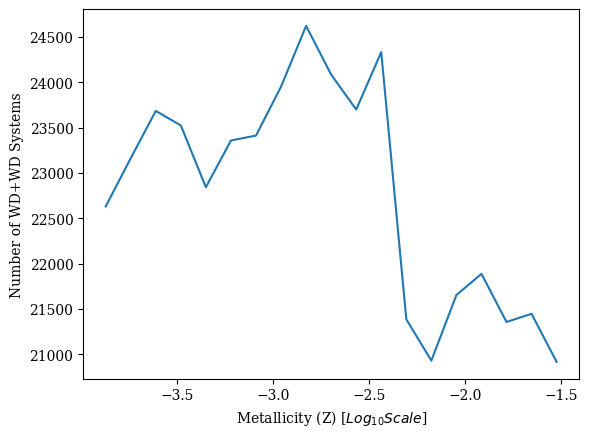

In [15]:
# let's plot our counts vs metallicities!

plt.plot(bins_Z[1:20], counts_bins)
plt.xlabel(r"Metallicity (Z) [$Log_{10} Scale$]")
plt.ylabel(r"Number of WD+WD Systems")

Let's now do a similar tast but count how many mergers there are per metallicity bin

In [16]:
# let's use the "Merges_Hubble_Time" flag to flag when binaries merge and produce graviational waves

merges_comaps = SP_COWD_DATA['Merges_Hubble_Time']==1

counts_bins_mergers = pd.cut(np.log10(SP_COWD_DATA['Metallicity@ZAMS(1)'][merges_comaps]), bins=bins_Z_SPS).value_counts(sort=False)
counts_bins_mergers


Metallicity@ZAMS(1)
(-4.0, -3.87]       22631
(-3.87, -3.739]     23163
(-3.739, -3.609]    23685
(-3.609, -3.479]    23524
(-3.479, -3.348]    22843
(-3.348, -3.218]    23359
(-3.218, -3.087]    23413
(-3.087, -2.957]    23953
(-2.957, -2.827]    24623
(-2.827, -2.696]    24086
(-2.696, -2.566]    23700
(-2.566, -2.436]    24334
(-2.436, -2.305]    21386
(-2.305, -2.175]    20929
(-2.175, -2.044]    21653
(-2.044, -1.914]    21887
(-1.914, -1.784]    21356
(-1.784, -1.653]    21446
(-1.653, -1.523]    20915
Name: count, dtype: int64

In [17]:
bins_Z

array([-4.        , -3.8696252 , -3.73925039, -3.60887559, -3.47850079,
       -3.34812599, -3.21775118, -3.08737638, -2.95700158, -2.82662677,
       -2.69625197, -2.56587717, -2.43550237, -2.30512756, -2.17475276,
       -2.04437796, -1.91400315, -1.78362835, -1.65325355, -1.52287875])

Text(0, 0.5, 'Number of WD+WD Systems')

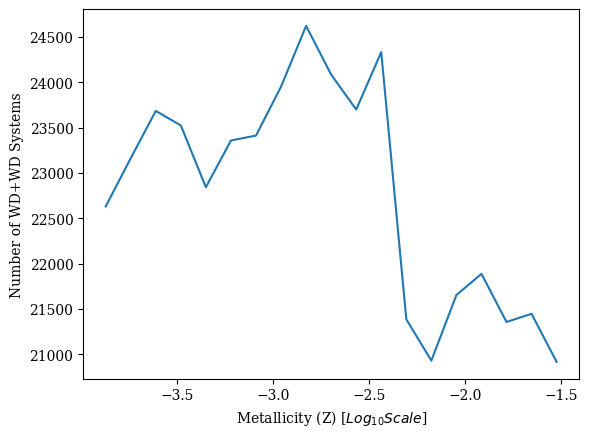

In [18]:
# let's plot our counts vs metallicities!
# there are only 19 ranges, so we group the lowest metallicity bin with the next range (start after -4 in our bin)

plt.plot(bins_Z[1:20], counts_bins_mergers)
plt.xlabel(r"Metallicity (Z) [$Log_{10} Scale$]")
plt.ylabel(r"Number of WD+WD Systems")

Let's try using plt.hist and plt.step

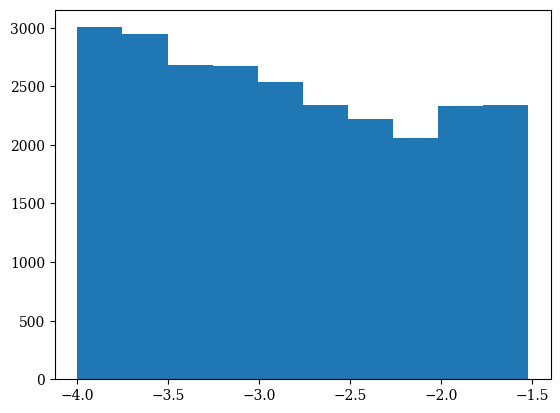

In [19]:
# let's make a histogram where the weights are the mixture weights 

metallicities_merged = SP_COWD_DATA['Metallicity@ZAMS(1)'][merges_comaps]
weights_merged = SP_COWD_DATA['mixture_weight'][merges_comaps]

# hist_SPS_metal, bin_edges_SPS_metal = np.histogram(np.log(metallicities),bins=bins_Z_SPS)

plt.hist(np.log10(metallicities_merged), weights=weights_merged)
plt.show()

Text(0, 0.5, 'Merged Systems')

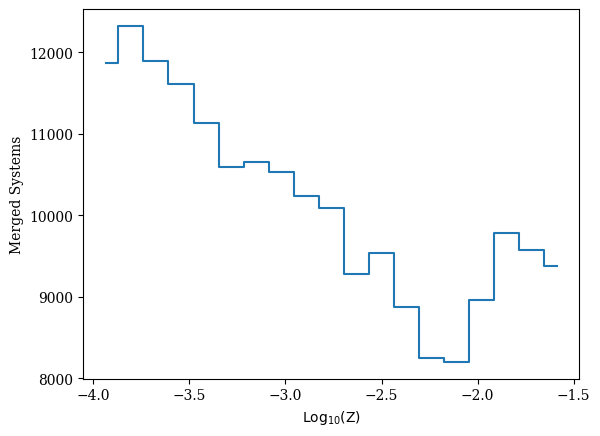

In [20]:
# check to see if the x vals are the center, left, or right of the bins
# in every bin sum the weights (add the mixture weigths that fall into each bin)
counts_bins_mergers, bin_edges_mergers = np.histogram(np.log10(metallicities_merged), weights=weights_merged, bins=bins_Z)
# left edges + right edges/2 = center of each bin
center_bins_mergers = (bin_edges_mergers[:-1] + bin_edges_mergers[1:])/2
# we need to consider the bin width so that if we change the normalization constant, the shape stays the same?
bin_width_mergers = np.diff(bin_edges_mergers)

plt.step(center_bins_mergers, counts_bins_mergers/bin_width_mergers, where='mid')
plt.xlabel(r"$\mathrm{Log_{10}}(\mathrm{Z)}$")
plt.ylabel(r"Merged Systems")

Let's do the same thing but normalize our counts with the amount of star forming mass needed to make the binaries at a each redshift using Lieke's method

In [21]:
###################################################
# New version of analytical calculation
###################################################
def analytical_star_forming_mass_per_binary_using_kroupa_imf(
        m1_min, m1_max, m2_min, fbin=1., imf_mass_bounds=[0.01,0.08,0.5,200]
):
    """
    Analytical computation of the mass of stars formed per binary star formed within the
    [m1 min, m1 max] and [m2 min, ..] rage,
    using the Kroupa IMF:

        p(M) \propto M^-0.3 for M between m1 and m2
        p(M) \propto M^-1.3 for M between m2 and m3;
        p(M) = alpha * M^-2.3 for M between m3 and m4;

    m1_min, m1_max are the min and max sampled primary masses
    m2_min is the min sampled secondary mass

    This function further assumes a flat mass ratio distribution with qmin = m2_min/m1, and  m2_max = m1_max
    Lieke base on Ilya Mandel's derivation
    """
    # Kroupa IMF 
    m1, m2, m3, m4 = imf_mass_bounds
    continuity_constants = [1./(m2*m3), 1./(m3), 1.0]  
    IMF_powers = [-0.3, -1.3, -2.3]  

    if m1_min < m3:
        raise ValueError(f"This analytical derivation requires IMF break m3  < m1_min ({m3} !< {m1_min})")
    if m1_min > m1_max:
        raise ValueError(f"Minimum sampled primary mass cannot be above maximum sampled primary mass: m1_min ({m1_min} !<  m1_max {m1_max})")
    if m1_max > m4:
        raise ValueError(f"Maximum sampled primary mass cannot be above maximum mass of Kroupa IMF:  m1_max ({m1_max} !<  m4 {m4})")
    
    # normalize IMF over the complete mass range:
    alpha = (-(m4**(-1.3)-m3**(-1.3))/1.3 - (m3**(-0.3)-m2**(-0.3))/(m3*0.3) + (m2**0.7-m1**0.7)/(m2*m3*0.7))**(-1)
    # print('alpha', alpha)

    # we want to compute M_stellar_sys_in_universe / N_binaries_in_COMPAS
    #  = N_binaries_in_universe/N_binaries_in_COMPAS * N_stellar_sys_in_universe/N_binaries_in_universe * M_stellar_sys_in_universe/N_stellar_sys_in_universe
    #  = 1/fint * 1/fbin * average mass of a stellar system in the Universe

    # fint =  N_binaries_in_COMPAS/N_binaries_in_universe: fraction of binaries that COMPAS simulates
    fint = -alpha / 1.3 * (m1_max ** (-1.3) - m1_min ** (-1.3)) + alpha * m2_min / 2.3 * (m1_max**(-2.3) - m1_min **(-2.3))


    # Next for N_stellar_sys_in_universe/N_binaries_in_universe * M_stellar_sys_in_universe/N_stellar_sys_in_universe
    # N_stellar_sys_in_universe/N_binaries_in_universe = the binary fraction 
    # fbin edges and values are chosen to approximately follow Figure 1 from Offner et al. (2023)
    binary_bin_edges = [m1, 0.08, 0.5, 1, 10, m4]    
    if isinstance(fbin, (int, float)):
        # Constant binary fraction
        binaryFractions = [fbin] * 5
    else:
        # Variable binary fraction with mass
        binaryFractions = [0.1, 0.225, 0.5, 0.8, 1.0] 


    # M_stellar_sys_in_universe/N_stellar_sys_in_universe = average mass of a stellar system in the Universe,
    # we are computing 1/fbin * M_stellar_sys_in_universe/N_stellar_sys_in_universe, skipping steps this leads to:
    # int_A^B (1/fb(m1) + 0.5) m1 P(m1) dm1. 
    # This is a double piecewise integral, i.e. pieces over the binary fraction bins and IMF mass bins.
    piece_wise_integral = 0

    # For every binary fraction bin
    for i in range(len(binary_bin_edges) - 1):
        fbin = binaryFractions[i] # Binary fraction for this range

        # And every piece of the Kroupa IMF
        for j in range(len(imf_mass_bounds) - 1):
            exponent = IMF_powers[j] # IMF exponent for these masses

            # Check if the binary fraction bin overlaps with the IMF mass bin
            if binary_bin_edges[i + 1] <= imf_mass_bounds[j] or binary_bin_edges[i] >= imf_mass_bounds[j + 1]:
                continue  # No overlap

            # Integrate from the most narrow range
            m_start = max(binary_bin_edges[i], imf_mass_bounds[j])
            m_end = min(binary_bin_edges[i + 1], imf_mass_bounds[j + 1])
            print("Integrating from", m_start, "to", m_end, "for fbin =", fbin, "and exponent =", exponent)

            # Compute the definite integral:
            integral = ( m_end**(exponent + 2) - m_start**(exponent + 2) ) / (exponent + 2) * continuity_constants[j]

            # Compute the sum term
            sum_term = (1 /fbin + 0.5) * integral
            piece_wise_integral += sum_term

    # combining them:
    Average_mass_stellar_sys_per_fbin = alpha * piece_wise_integral

    # Now compute the average mass per binary in COMPAS M_stellar_sys_in_universe / N_binaries_in_COMPAS
    M_sf_Univ_per_N_binary_COMPAS = (1/fint) * Average_mass_stellar_sys_per_fbin

    return M_sf_Univ_per_N_binary_COMPAS

In [22]:
pathToweights_H5 = '/home/jovyan/CompasOutput/v03.08.01/N1e6_MassiveWDWD_NSNS_CEalpha1/MainRun/COMPAS_Output_wWeights.h5'  #path of the hdf5 file

raw_data = h5.File(pathToweights_H5,"r")

In [23]:
# checking the max and min of m1 and m2
list(raw_data['Run_Details'].keys())
# initial-mass-min, initial-mass-max
print(raw_data['Run_Details']["initial-mass-min"][0], raw_data['Run_Details']["initial-mass-max"][0], raw_data['Run_Details']["minimum-secondary-mass"][0])

print(max(raw_data['BSE_System_Parameters']['Mass@ZAMS(1)'][()]))
print(min(raw_data['BSE_System_Parameters']['Mass@ZAMS(1)'][()]))

raw_data.close()


5.0 150.0 0.1
149.34065786735843
0.9000007862487008


In [24]:
m1min = 0.9
m1max = 150
m2min= 0.1

analytical_star_forming_mass_per_binary = analytical_star_forming_mass_per_binary_using_kroupa_imf(m1min, m1max, m2min)

Integrating from 0.01 to 0.08 for fbin = 1.0 and exponent = -0.3
Integrating from 0.08 to 0.5 for fbin = 1.0 and exponent = -1.3
Integrating from 0.5 to 1 for fbin = 1.0 and exponent = -2.3
Integrating from 1 to 10 for fbin = 1.0 and exponent = -2.3
Integrating from 10 to 200 for fbin = 1.0 and exponent = -2.3


In [25]:
analytical_star_forming_mass_per_binary

8.884005303564408

We need to make sure that the counts are weighted by mixture weights

Text(0, 0.5, 'Merged Systems Per Star Forming Mass')

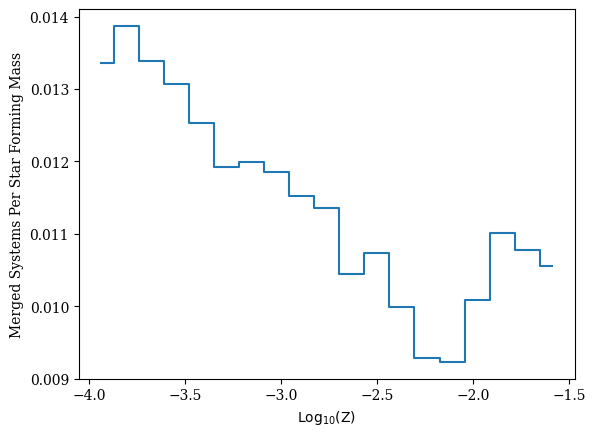

In [28]:
# let's plot our normalized counts vs metallicities!
# there are only 19 ranges, so we group the lowest metallicity bin with the next range (start after -4 in our bin)

# check to see if the x vals are the center, left, or right of the bins
# in every bin sum the weights (add the mixture weigths that fall into each bin)
counts_bins_mergers, bin_edges_mergers = np.histogram(np.log10(metallicities_merged), weights=weights_merged, bins=bins_Z)
# left edges + right edges/2 = center of each bin
center_bins_mergers = (bin_edges_mergers[:-1] + bin_edges_mergers[1:])/2
# we need to consider the bin width so that if we change the normalization constant, the shape stays the same?
bin_width_mergers = np.diff(bin_edges_mergers)

# we now need to see how we can make the counts we get mroe realistic and rep the universe not just what we simulated
numer_of_binaries_simulated_per_bin = 1e5 #this works because we have systems with metallicites that are uniform in log 
total_SFM_per_bin = analytical_star_forming_mass_per_binary*numer_of_binaries_simulated_per_bin # total SFM that COMPAS simulation represents in each bin - makes hist more realistic 

plt.step(center_bins_mergers, (counts_bins_mergers/total_SFM_per_bin)/bin_width_mergers, where='mid')
plt.xlabel(r"$\mathrm{Log_{10}}(\mathrm{Z)}$")
plt.ylabel(r"Merged Systems Per Star Forming Mass")

We now want to find the metallicity yield for the specific mass regimes we care about

In [29]:
# let's add the flags for specific calssifications of SN Ia

SN_Ia_HVS,two_star_SNIA,Champagne_Supernova = useful_fncs.check_if_SNIA(SP_COWD_DATA['Mass(1)'],SP_COWD_DATA['Mass(2)'])
# adding the flags to the dataframe
SP_COWD_DATA = SP_COWD_DATA.assign(SN_Ia_HVS = SN_Ia_HVS)
SP_COWD_DATA = SP_COWD_DATA.assign(two_star_SNIA = two_star_SNIA)
SP_COWD_DATA = SP_COWD_DATA.assign(Champagne_Supernova = Champagne_Supernova)

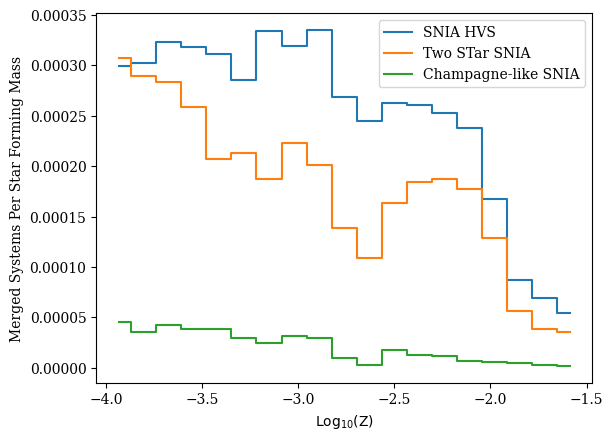

In [31]:
# let's plot our normalized counts vs metallicities!

# SNIA_HVS
SN_Ia_HVS_merged = SN_Ia_HVS*merges_comaps

counts_bins_mergers_HVS, bin_edges_mergers_HVS = np.histogram(np.log10(SP_COWD_DATA['Metallicity@ZAMS(1)'][SN_Ia_HVS_merged]), weights=SP_COWD_DATA['mixture_weight'][SN_Ia_HVS_merged], bins=bins_Z)
# left edges + right edges/2 = center of each bin
center_bins_mergers_HVS = (bin_edges_mergers_HVS[:-1] + bin_edges_mergers_HVS[1:])/2
# we need to consider the bin width so that if we change the normalization constant, the shape stays the same?
bin_width_mergers_HVS = np.diff(bin_edges_mergers_HVS)

# we now need to see how we can make the counts we get mroe realistic and rep the universe not just what we simulated
numer_of_binaries_simulated_per_bin = 1e5 #this works because we have systems with metallicites that are uniform in log 
total_SFM_per_bin = analytical_star_forming_mass_per_binary*numer_of_binaries_simulated_per_bin # total SFM that COMPAS simulation represents in each bin - makes hist more realistic 

plt.step(center_bins_mergers_HVS, (counts_bins_mergers_HVS/total_SFM_per_bin)/bin_width_mergers_HVS, where='mid', label = 'SNIA HVS')


# two star SN
two_star_SNIA_merged = two_star_SNIA*merges_comaps

counts_bins_mergers_twostar, bin_edges_mergers_twostar = np.histogram(np.log10(SP_COWD_DATA['Metallicity@ZAMS(1)'][two_star_SNIA_merged]), weights=SP_COWD_DATA['mixture_weight'][two_star_SNIA_merged], bins=bins_Z)
# left edges + right edges/2 = center of each bin
center_bins_mergers_twostar = (bin_edges_mergers_twostar[:-1] + bin_edges_mergers_twostar[1:])/2
# we need to consider the bin width so that if we change the normalization constant, the shape stays the same?
bin_width_mergers_twostar = np.diff(bin_edges_mergers_twostar)

# we now need to see how we can make the counts we get mroe realistic and rep the universe not just what we simulated
numer_of_binaries_simulated_per_bin = 1e5 #this works because we have systems with metallicites that are uniform in log 
total_SFM_per_bin = analytical_star_forming_mass_per_binary*numer_of_binaries_simulated_per_bin # total SFM that COMPAS simulation represents in each bin - makes hist more realistic 

plt.step(center_bins_mergers_twostar, (counts_bins_mergers_twostar/total_SFM_per_bin)/bin_width_mergers_twostar, where='mid', label = 'Two STar SNIA')


# Champagne_Supernova
Champagne_Supernova_merged = Champagne_Supernova*merges_comaps

counts_bins_mergers_champ, bin_edges_mergers_champ = np.histogram(np.log10(SP_COWD_DATA['Metallicity@ZAMS(1)'][Champagne_Supernova_merged]), weights=SP_COWD_DATA['mixture_weight'][Champagne_Supernova_merged], bins=bins_Z)
# left edges + right edges/2 = center of each bin
center_bins_mergers_champ = (bin_edges_mergers_champ[:-1] + bin_edges_mergers_champ[1:])/2
# we need to consider the bin width so that if we change the normalization constant, the shape stays the same?
bin_width_mergers_champ = np.diff(bin_edges_mergers_champ)

# we now need to see how we can make the counts we get mroe realistic and rep the universe not just what we simulated
numer_of_binaries_simulated_per_bin = 1e5 #this works because we have systems with metallicites that are uniform in log 
total_SFM_per_bin = analytical_star_forming_mass_per_binary*numer_of_binaries_simulated_per_bin # total SFM that COMPAS simulation represents in each bin - makes hist more realistic 

plt.step(center_bins_mergers_champ, (counts_bins_mergers_champ/total_SFM_per_bin)/bin_width_mergers_champ, where='mid', label = 'Champagne-like SNIA')



plt.xlabel(r"$\mathrm{Log_{10}}(\mathrm{Z)}$")
plt.ylabel(r"Merged Systems Per Star Forming Mass")

plt.legend()




Both methods get me the same plot and values! We are just missing one system in each method

Let's do this again for neutron star - neutron star systems

In [31]:
# reading in the HDF5 file
pathTorates_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/CosmicIntegration/Rate_info.h5' #path of the hdf5 file

Data_rates_NS = h5.File(pathTorates_NS)

In [32]:
list(Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info_NS = Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']
rates_info_NS.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [33]:
dco_mask_NS = rates_info_NS['DCOmask'][()]

In [34]:
# reading in the HDF5 file
pathToweights_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/MainRun/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights_NS = h5.File(pathToweights_NS)

In [35]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_NS_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights_NS["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_NS_data[key] = Data_weights_NS["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [36]:
merging_all_NS = DCO_NS_data[dco_mask_NS]
merging_all_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
323,1,4.914255,0.144223,0,b'2 ',b'4-8 ',1.210342,1.442315,1,0.000686,...,7235,0.002952,13,13,38.082441,0.000099,-1.448854,0.0,0.0,0.024294
1336,1,110.465241,0.730318,0,b'2 ',b'4-8 ',1.260087,1.424028,1,0.000537,...,29725,0.012377,13,13,39.974896,0.000087,-1.417040,0.0,0.0,0.028337
1759,1,3594.070404,0.356025,0,b'5 ',b'8 ',1.480496,1.171439,1,0.025743,...,39167,0.016939,13,13,24.544319,0.000072,-1.093873,0.0,0.0,0.011341
1915,1,15.038578,0.292517,0,b'4-8 ',b'8 ',1.188053,1.203831,1,0.001179,...,42602,0.003843,13,13,38.306424,0.000179,-1.376143,0.0,0.0,0.025722
1955,1,6.854551,0.692189,0,b'2 ',b'4-8 ',1.260033,1.195963,1,0.013255,...,43466,0.005260,13,13,36.808308,0.000033,-1.205352,0.0,0.0,0.023426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46667,1,2.035270,0.304401,0,b'2 ',b'4-8 ',1.242316,1.573235,1,0.002852,...,999727,0.002643,13,13,35.825917,0.000153,-1.611445,0.0,0.0,0.013998
46668,1,0.978486,0.008180,0,b'2 ',b'4-8 ',1.260145,1.554736,1,0.000184,...,999770,0.002022,13,13,36.031843,0.000145,-1.593994,0.0,0.0,0.025480
46671,1,2.060512,0.283681,0,b'2 ',b'4-8 ',1.260112,1.308423,1,0.000471,...,999894,0.002454,13,13,40.501417,0.000112,-1.432607,0.0,0.0,0.007313
46672,1,0.808230,0.271005,0,b'2 ',b'4-8 ',1.260144,1.752863,1,0.000146,...,999931,0.002160,13,13,36.358539,0.000144,-1.707163,0.0,0.0,0.017477


In [37]:
# let's first make our bins that we want that are evenly spaced in log
metallicities_NSNS = np.array(merging_all_NS['Metallicity@ZAMS(1)'])
metallicities_log_NSNS = np.log10(metallicities)
even_Z_NSNS = np.linspace(-4, np.max(metallicities_log_NSNS), 20)
bins_Z_NSNS = even_Z_NSNS
bins_Z_NSNS

array([-4.        , -3.8696316 , -3.73926319, -3.60889479, -3.47852639,
       -3.34815799, -3.21778958, -3.08742118, -2.95705278, -2.82668438,
       -2.69631597, -2.56594757, -2.43557917, -2.30521077, -2.17484236,
       -2.04447396, -1.91410556, -1.78373716, -1.65336875, -1.52300035])

We now want to count how many systems are in each of these metallicity bins

In [38]:
# Get the total mass evolved per Z
# think about hoe bonary fraction changes fro different mass bins (Offner, Moe 2022) - figure 1
totalMassEvolvedPerMetallicity_NS = totalMassEvolvedPerZ(pathToweights_NS,
                         binaryFraction=0.7, Mmin_universe=0.05, Mmax_universe=300.,
                         metallicity_bins = 10**(bins_Z_NSNS))
print('Total mass evolved per Z:', totalMassEvolvedPerMetallicity_NS)

Weighted samples
using continuous metallicities !! Assumed to be sampled flat-in-log !!
Total mass evolved per Z: [0.00000000e+00 1.09749063e+06 1.10153586e+06 1.10046809e+06
 1.09455424e+06 1.08843505e+06 1.08457463e+06 1.09882535e+06
 1.08935909e+06 1.07929734e+06 1.09566309e+06 1.08395860e+06
 1.07615561e+06 1.07139168e+06 1.06543676e+06 1.07287014e+06
 1.06071390e+06 1.06948200e+06 1.05457418e+06 1.04870140e+06
 6.98162317e+02]


In [39]:
len(totalMassEvolvedPerMetallicity_NS)

21

In [40]:
bin_indices_NS = np.digitize(np.log10(merging_all_NS['Metallicity@ZAMS(1)']), bins_Z_NSNS) # Bin your metallicities, make sure both bins in log space
# np.digitize - checks which metallicity bin a specific compas metals should fall in (with say which numbered bin the system should be in)
# return an array of numbers that represent the bins (the 1st metallicity is in bin 5...)
print(len(np.unique(bin_indices_NS)))

19


In [41]:
# weights = np.array(merging_all_NS['mixture_weight']) # let's gather the micture weights we have for these systems
weighted_counts_NS = [] # let's make an empty list to add to later

# we can loop through our first to 20th metallicity bin
for bin in np.unique(bin_indices_NS):
    metals_bool = np.where(bin_indices_NS==bin)[0] # we want to see where in our array a system falls within to a certain bin
    # for example we want to see where in bin_indicies the systems fall into the first metallicity bin 
    weighted_counts_NS.append(sum(merging_all_NS['mixture_weight'].iloc[metals_bool])) # we then select only the weights pertaining to a certian metallicity bin and sum them up

In [42]:
# divide the weighted sums with the total mass evolved oer metallicity

formation_efficency_NS = weighted_counts_NS/totalMassEvolvedPerMetallicity_NS[1:]
# number of systems formed / mass evolved for these systems to be made (take the nondiscrete and weighted samples metallicity)

ValueError: operands could not be broadcast together with shapes (19,) (20,) 

Text(0, 0.5, 'Number of NSNS Systems')

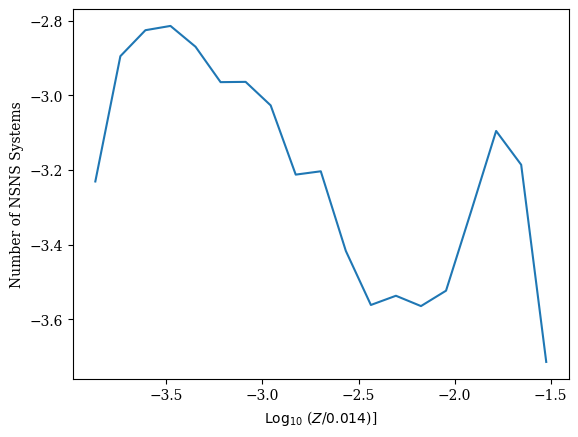

In [ ]:
# need to take one less bin in the bins_Z array because the last bin is just anything greater than a certain metallicity
plt.plot(bins_Z_NSNS[1:20], np.log10(counts_bins_NSNS_array/totalMassEvolvedPerMetallicity[1:20])) # this does not seem correct 
plt.xlabel(r"$\mathrm{Log_{10}}$ ($Z$/$\mathrm{0.014}$)]")
plt.ylabel(r"Number of NSNS Systems")

Let's try the histogram route

Text(0, 0.5, 'dN/$dM_{2}$ [$Log_{10} Scale$]')

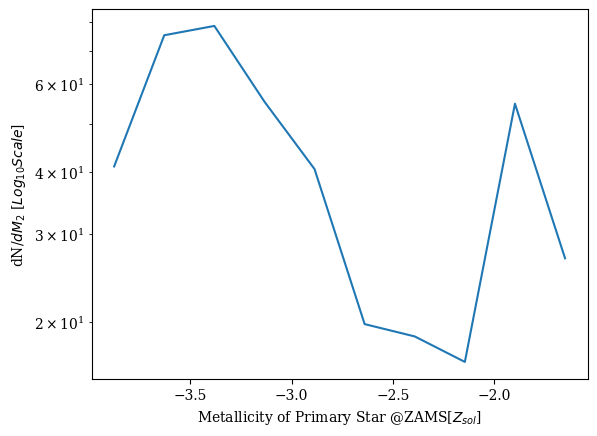

In [ ]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(np.log10(merging_all_NS['Metallicity@ZAMS(1)']), weights=merging_all_NS['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,(hist/bin_width))
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Metallicity of Primary Star @ZAMS[$Z_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dM_{2}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\



In [43]:
# i think I also need to find the anount of mass caused to form a NSNS merger oer metallicity
# do this for the neutron star simulation and divide by total mass evloved per metallicity and see if comparable to what Lieke sent
# because using AIS, we need to sum the weights of each system to count whihc systems go to which bins accuratley - if I used np.histogram (use the flag weights)
# or use what I did before but instead of counting each system, 

Let's try to normalize this with the average star forming mass needed for each metallicity